In [41]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
from functools import reduce

# Modelling Algorithms
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.externals import joblib

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'whitegrid' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [2]:
full = pd.read_csv('../my_data/processed/processed.csv', index_col=0)
full.head()

,age,new_user,total_pages_visited,converted,country__China,country__Germany,country__UK,country__USA,source__Ads,source__Direct,source__Organic
0,35,1,4.0,0,0,0,0,1,1,0,0
1,25,1,5.0,0,1,0,0,0,0,1,0
2,50,1,3.0,0,0,0,1,0,0,1,0
3,33,1,5.0,0,1,0,0,0,1,0,0
4,38,1,2.0,0,0,0,0,1,1,0,0


In [3]:
train, test = train_test_split(full)

train_X = train.drop(columns=['converted'])
train_y = train.converted
test_X = test.drop(columns=['converted'])
test_y = test.converted

# check sizes
print (full.shape , train_X.shape , test_X.shape , train_y.shape , test_y.shape)

((467352, 11), (350514, 10), (116838, 10), (350514,), (116838,))


A problem here is that since about 97% of our csutomers do not convert, and we potentially don't care too much about the "will not convert condition".

Precision - when we predict yes, how often are we right?
Recall - When it's actually yes, how often does it predict yes?

In [4]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=2)

Text(0.5,1,'Cross validation scores')

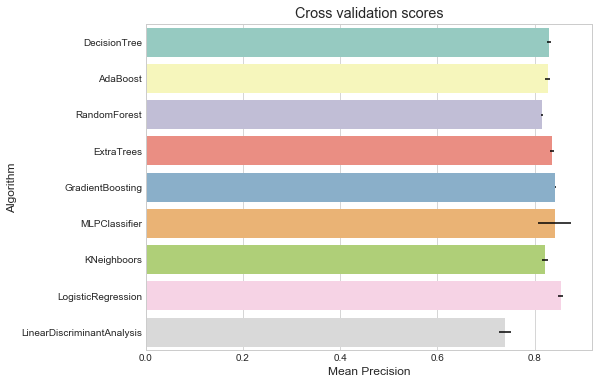

In [47]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []

classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, train_X, y = train_y, scoring = "precision", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["DecisionTree","AdaBoost","RandomForest","ExtraTrees","GradientBoosting", "MLPClassifier","KNeighboors", "LogisticRegression", "LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Precision")
g.set_title("Cross validation scores")

Text(0.5,1,'Cross validation scores')

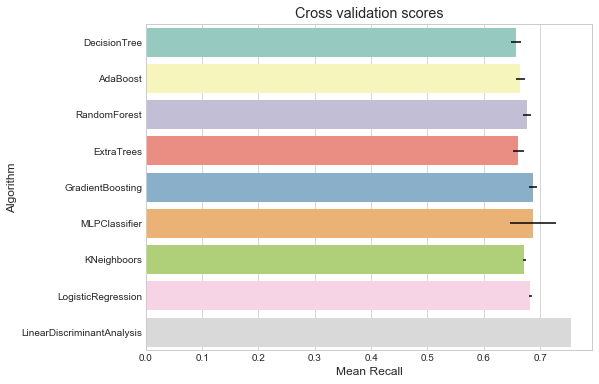

In [48]:

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, train_X, y = train_y, scoring = "recall", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["DecisionTree","AdaBoost","RandomForest","ExtraTrees","GradientBoosting", "MLPClassifier","KNeighboors", "LogisticRegression", "LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Recall")
g.set_title("Cross validation scores")

Text(0.5,1,'Cross validation scores')

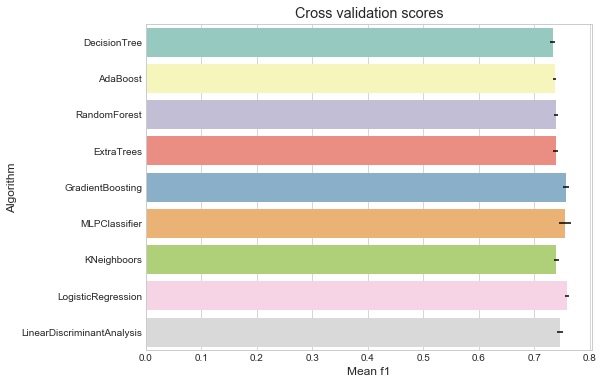

In [49]:

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, train_X, y = train_y, scoring = "f1", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["DecisionTree","AdaBoost","RandomForest","ExtraTrees","GradientBoosting", "MLPClassifier","KNeighboors", "LogisticRegression", "LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean f1")
g.set_title("Cross validation scores")

Text(0.5,1,'Cross validation scores')

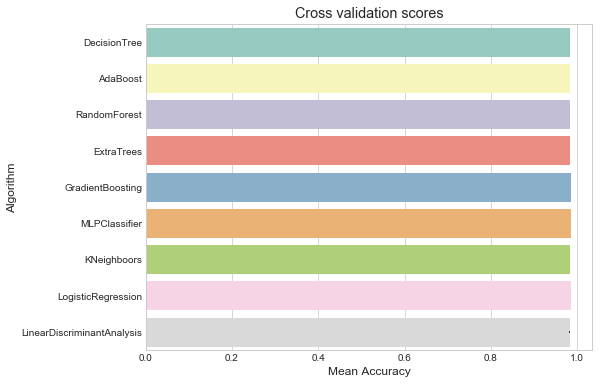

In [50]:

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, train_X, y = train_y, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["DecisionTree","AdaBoost","RandomForest","ExtraTrees","GradientBoosting", "MLPClassifier","KNeighboors", "LogisticRegression", "LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g.set_title("Cross validation scores")

From the above graphs we can see how Accuracy might be a bit difficult to work with as a target, instead we can choose the best performers with f1 score as a target to give us a model more focused on accurately predicting conversion.
The best performing are:
* LogisticRegression
* MLP
* GradientBoosting
* LinearDiscirminantAnalysis

We will grid search over these to somewhat tune the hyperparemeters, though I don't want to spend too much time on this.

In [13]:
### META MODELING  WITH RF, EXTRATREES, GRADIENTBOOSTING and LDA
# Takes about 6 seconds to train, f1 75.8%
# RFC Parameters tunning 
LR = LogisticRegression()

## Search grid for optimal parameters
lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

gsLR = GridSearchCV(LR,param_grid = lr_param_grid, cv=kfold, scoring="f1", n_jobs= 4, verbose = 1)

gsLR.fit(train_X,train_y)

LR_best = gsLR.best_estimator_

Fitting 2 folds for each of 7 candidates, totalling 14 fits


[Parallel(n_jobs=4)]: Done  14 out of  14 | elapsed:    5.9s finished


In [14]:
# Best score
print(gsLR.best_score_)

0.758400915727


In [15]:
# Takes about 4 minutes to train, f1 76.3%
#ExtraTrees 
MLP = MLPClassifier()


## Search grid for optimal parameters
mlp_param_grid = {"activation": ["identity", "logistic", "tanh", "relu"],
              "alpha": [0.0001, 0.001, 0.01]}


gsMLP = GridSearchCV(MLP,param_grid = mlp_param_grid, cv=kfold, scoring="f1", n_jobs= 4, verbose = 1)

gsMLP.fit(train_X,train_y)

MLP_best = gsMLP.best_estimator_

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed:  4.2min finished


In [16]:
# Best score
print(gsMLP.best_score_)

0.762246542778


In [17]:
# Takes about 4.8 minutes to train, f1 76.0%
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200],
              'learning_rate': [0.1, 0.05],
              'max_depth': [4, 8],
              'min_samples_leaf': [100],
              'max_features': [0.3] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="f1", n_jobs= 4, verbose = 1)

gsGBC.fit(train_X,train_y)

GBC_best = gsGBC.best_estimator_

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:  2.7min finished


In [18]:
# Best score
print(gsGBC.best_score_)

0.760261544451


In [19]:
# Takes about 0.9 secs to train, f1 74.5%
# LDA tunning

LDA = LinearDiscriminantAnalysis()
lda_param_grid = {'solver' : ["svd", "lsqr"]}

gsLDA = GridSearchCV(LDA,param_grid = lda_param_grid, cv=kfold, scoring="f1", n_jobs= 4, verbose = 1)

gsLDA.fit(train_X,train_y)

LDA_best = gsLDA.best_estimator_

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.8s finished


In [20]:
# Best score
print(gsLDA.best_score_)

0.743772732527


Plot learning curves

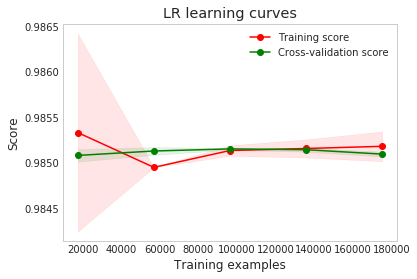

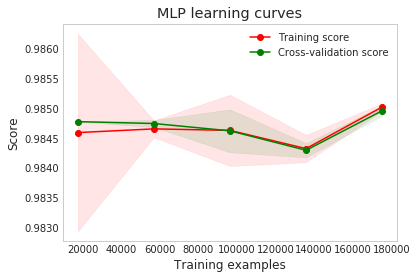

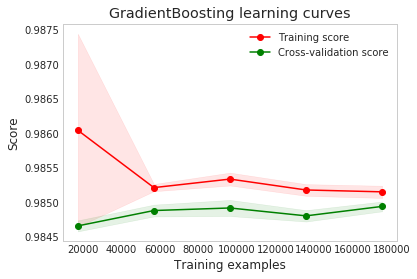

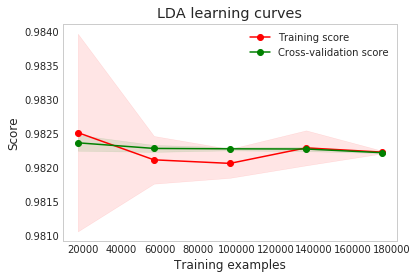

In [21]:

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsLR.best_estimator_,"LR learning curves",train_X,train_y,cv=kfold)
g = plot_learning_curve(gsMLP.best_estimator_,"MLP learning curves",train_X,train_y,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",train_X,train_y,cv=kfold)
g = plot_learning_curve(gsLDA.best_estimator_,"LDA learning curves",train_X,train_y,cv=kfold)

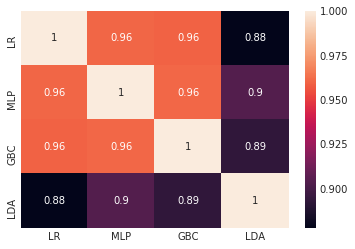

In [30]:
test_Survived_LR = pd.Series(LR_best.predict(test_X), name="LR")
test_Survived_MLP = pd.Series(MLP_best.predict(test_X), name="MLP")
test_Survived_GBC = pd.Series(GBC_best.predict(test_X), name="GBC")
test_Survived_LDA = pd.Series(LDA_best.predict(test_X), name="LDA")

# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_LR, test_Survived_MLP, test_Survived_GBC,test_Survived_LDA],axis=1)

g= sns.heatmap(ensemble_results.corr(),annot=True)

In [31]:
votingC = VotingClassifier(estimators=[('lr', LR_best), ('mlp', MLP_best), ('gbc', GBC_best),('lda',LDA_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(train_X, train_y)

In [32]:
y_pred = votingC.predict(test_X)

In [33]:
# just checking there are some predicted 1s
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 113303, 1: 3535}

In [34]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[ 0.99439169  0.00560831]
 [ 0.30014465  0.69985535]]


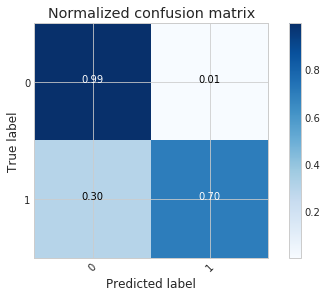

In [35]:
# confusion matrix plots out TP, TN, FP, FN
cf = confusion_matrix(test_y, y_pred)
    
plot_confusion_matrix(cf, classes=[0,1], normalize=True,
                      title='Normalized confusion matrix')

In [36]:
# 97% of the sessions do not convert, so 98.4% accuracy is great!
# Accuracy - How often is the classifier correct
# 0.98393502114038245
accuracy_score(test_y, y_pred)

0.98393502114038245

In [37]:
# 0.82121640735502122
# When it predicts yes, how often is it correct?
precision_score(test_y, y_pred)

0.82121640735502122

In [38]:
# 0.69985535197685633
# when it is a yes, how often did we predict yes?
recall_score(test_y, y_pred)

0.69985535197685633

In [39]:
# 0.75569439021215679
f1_score(test_y, y_pred)

0.75569439021215679

In [46]:
# output pickled model
joblib.dump(votingC, '../src/models/final_model.pkl') 

['../src/models/final_model.pkl']

In [47]:
# check for overfitting
y_pred_2 = votingC.predict(train_X)

In [48]:
# 0.9860433534751821
accuracy_score(train_y, y_pred_2)

0.98490502519157574

In [49]:
# 0.849102377486657
precision_score(train_y, y_pred_2)

0.824530857032308

In [50]:
# 0.7239182592868371
recall_score(train_y, y_pred_2)

0.71027414382134824

In [51]:
# 0.7815291175419792
# slightly overfit
f1_score(train_y, y_pred_2)

0.76314964859662471